**Project Details**

| | Details |
|----------|---------|
| Author   | Alfrethanov Christian Wijaya |
| Dataset  | retail_raw_reduced_data_quality.csv |
| Goal     | Creating Data Cleaning Cheat Sheet. |

# **DATA CLEANING**

--> **Cheat Sheet**

**Dataset :**

retail_raw_reduced_data_quality.csv

<br>

**Goal :**

Creating a Cheat Sheet for Data Cleaning

<br>

**References :**

DQLab

---

# **START**

---

Before we START this program, please drag the CSV file to the Files section at the sidebar.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import io

In [ ]:
# Import Datasets
df = pd.read_csv('retail_raw_reduced_data_quality.csv')

In [ ]:
df.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN


# **Data Cleaning**

## **Handling Missing Values**

In [ ]:
# Check column that contains Missing Value
print('Check:')
print(df.isnull().any())

# Filling the missing value (imputation) with the Mean / Mode value of the column
print('\nFill the missing value:')
print(df['quantity'].fillna(df['quantity'].mean()))

# Drop missing value
print('\nDrop missing value:')
print(df['quantity'].dropna())

# Drop the Row / Column that contains Missing Value (Don't use this method if it's possible)
# If you want to drop the column, make sure that the Missing Values in that column is more than 50% of that column's data count
# print(df.drop(['column_name'], axis=1))

Check:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

Fill the missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


@**Notes:**
1. `axis = 1` : Column / Vertical Axis
2. `axis = 0` : Row / Horizontal Axis

# **Handling Outliers**

## **.boxplot()**

Checking if there are any outliers in each datasets columns by visualization method using **.boxplot()** function.

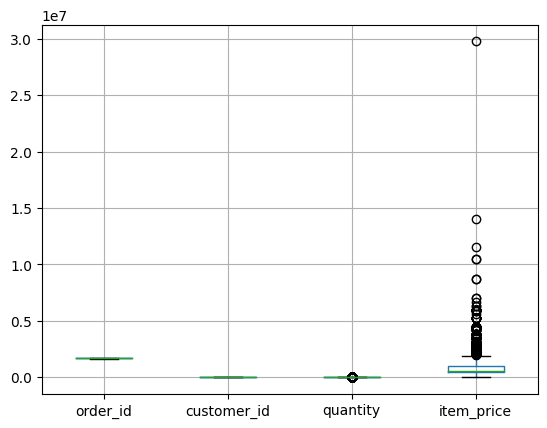

In [ ]:
import matplotlib.pyplot as plt

df.boxplot()
plt.show()

## **Example 1**

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Check shape
print('Shape: ', df.shape)

# Removing outliers
df = df[~((df['quantity'] < (Q1 - 1.5 * IQR)) | (df['quantity'] > (Q3 + 1.5 * IQR)))]

# Check shape after the outliers is removed
print('Final Shape: ', df.shape)

Shape:  (5000, 9)
Final Shape:  (4699, 9)


## **Example 2**

In [ ]:
Q1x = df['item_price'].quantile(0.25)
Q3x = df['item_price'].quantile(0.75)
IQRx = Q3x - Q1x

# Checking how many outliers in 'item_price' column
# print(df[((df['item_price'] < (Q1x - 1.5 * IQRx)) | (df['item_price'] > (Q3x + 1.5 * IQRx)))])
# Result : 320 rows contain Missing Values in 'item_price' column

# Remove outliers in 'item_price' column
dfx = df[~((df['item_price'] < (Q1x - 1.5 * IQRx)) | (df['item_price'] > (Q3x + 1.5 * IQRx)))]

# Check shape after the outliers is removed
print('Final Shape: ', dfx.shape)

Final Shape:  (4379, 9)


## **Final Result**

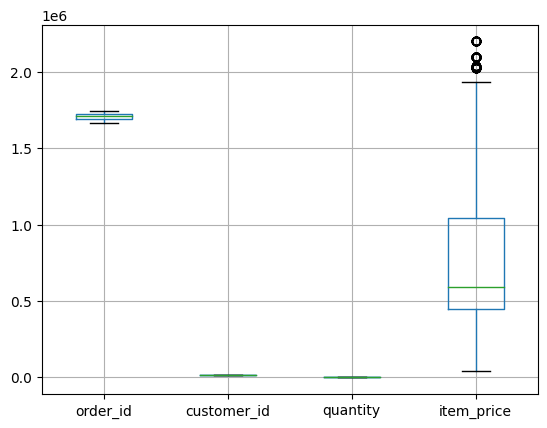

In [ ]:
dfx.boxplot()
plt.show()

# **Handling Duplicated Data**

Duplicated Data : Rows that contain the same value in all of its columns.

In [ ]:
# Check if there are data duplicates in the dataset
print("Duplicated Data in the Dataset: ", df.duplicated(subset=None))
print("Shape:", df.shape)

# Drop all duplicate rows
df.drop_duplicates()

print("Final Shape:", df.shape)

Duplicated Data in the Dataset:  0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 4699, dtype: bool
Shape: (4699, 9)
Final Shape: (4699, 9)
